<center><h1>DSCI-552 HOMEWORK 4-Part3</h1><center>
<br>
<center><font size="4"></font></center>
<center><font size="3"><strong>Mason(Mohan) Xing</font></center>
<center><font size="3"><strong>USCID:	6880083372</font></center>

In [1]:
# import dependencies
import warnings
warnings.filterwarnings("ignore")

import os
import urllib
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# check the environment
print (os.environ['CONDA_DEFAULT_ENV'])
!java -version

dsci552


java version "9.0.4"
Java(TM) SE Runtime Environment (build 9.0.4+11)
Java HotSpot(TM) 64-Bit Server VM (build 9.0.4+11, mixed mode)


In [2]:
import javabridge
import weka.core.jvm as jvm
jvm.start(packages=True)
# refresh package cache
import weka.core.packages as packages
packages.refresh_cache()
packages.install_package("SMOTE")
items = packages.installed_packages()
for item in items:
    print(item.name + " " + item.url)

DEBUG:weka.core.jvm:Adding bundled jars
DEBUG:weka.core.jvm:Classpath=['C:\\Users\\Mason\\anaconda3\\envs\\dsci552\\Lib\\site-packages\\javabridge\\jars\\rhino-1.7R4.jar', 'C:\\Users\\Mason\\anaconda3\\envs\\dsci552\\Lib\\site-packages\\javabridge\\jars\\runnablequeue.jar', 'C:\\Users\\Mason\\anaconda3\\envs\\dsci552\\Lib\\site-packages\\javabridge\\jars\\cpython.jar', 'C:\\Users\\Mason\\anaconda3\\envs\\dsci552\\lib\\site-packages\\weka\\lib\\python-weka-wrapper.jar', 'C:\\Users\\Mason\\anaconda3\\envs\\dsci552\\lib\\site-packages\\weka\\lib\\weka.jar']
DEBUG:weka.core.jvm:MaxHeapSize=default
DEBUG:weka.core.jvm:Package support enabled


SMOTE http://prdownloads.sourceforge.net/weka/SMOTE1.0.3.zip?download


In [3]:
# from weka.core.dataset import create_instances_from_matrices
from weka.core.converters import Loader
from weka.classifiers import Classifier, Evaluation, PredictionOutput, FilteredClassifier
from weka.core.classes import Random
# from weka.core.dataset import Instances
import weka.plot.classifiers as plcls  
from weka.filters import Filter

## 2(e) Model Trees
ref: http://fracpete.github.io/python-weka-wrapper/examples.html <br>
ref: http://fracpete.github.io/python-weka-wrapper/api.html#experiments<br>
ref: https://fracpete.github.io/python-weka-wrapper3/examples.html#cross-validate-filtered-classifier-and-print-evaluation-and-display-roc <br>
ref: https://waikato.github.io/weka-blog/posts/2019-01-30-sampling/<br>
ref: https://python.hotexamples.com/examples/weka.classifiers/Evaluation/test_model/python-evaluation-test_model-method-examples.html

In [4]:
weka_train_file = '../data/weka_train.csv'
weka_test_file = '../data/weka_test.csv'

In [5]:
# Load dataset
loader = Loader(classname="weka.core.converters.CSVLoader")
weka_train = loader.load_file(weka_train_file)
weka_test = loader.load_file(weka_test_file)
weka_train.class_is_last()
weka_test.class_is_last()

In [6]:
# define a function to print out model summary
def evl_summary(evl, title):
    
    print("{} Percent Correct:".format(title), evl.percent_correct)
    print("{} Error Rate:".format(title), evl.error_rate)
    print("-"*80)
    print(evl.summary())
    print("-"*80)
    print(evl.class_details())
    print("-"*80)
    cm = evl.confusion_matrix.astype(int)
    print(cm)

In [7]:
# define confusion matix function
def evl_cm(cm,  title):
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Neg', 'Pos'])
    fig, ax = plt.subplots(figsize=(6,6))
    ax.set_title("{} Data Confustion Matrix".format(title), fontsize=16)
    disp.plot(ax=ax)
    plt.show()

In [8]:
# define roc curve function
def evl_roc(evl, title):
    
    plcls.plot_roc(evl, class_index=[0, 1], title="{} ROC Curve".format(title), wait=True)

In [9]:
# define a function to combine all functions
def evl_combine(evl, title):
    
    evl_summary(evl, title)
    cm = evl.confusion_matrix
    cm = cm.astype(int)
    evl_cm(cm,  title)
    print("-"*80)
    evl_roc(evl, title)

### - 2(e) Cross Validation 

In [23]:
%%time
# Perform crossvalidation
lmt_cv = Classifier(classname='weka.classifiers.trees.LMT')
pout = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
evl_cv = Evaluation(weka_train)
evl_cv.crossvalidate_model(lmt_cv, weka_train, 5, Random(42), pout)

Wall time: 28min 56s


In [25]:
# print result summary
evl_summary(evl_cv, title="Mean Cross Validation")

Mean Cross Validation Percent Correct: 99.17333333333333
Mean Cross Validation Error Rate: 0.008266666666666667
--------------------------------------------------------------------------------

Correctly Classified Instances       59504               99.1733 %
Incorrectly Classified Instances       496                0.8267 %
Kappa statistic                          0.7277
Mean absolute error                      0.0113
Root mean squared error                  0.082 
Relative absolute error                 34.5115 %
Root relative squared error             64.0792 %
Total Number of Instances            60000     

--------------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.323    0.995      0.997    0.996      0.730    0.963     0.998     neg
                 0.677    0.003    0.796      0.677    0.732  

### - 2(e) Training Data

In [12]:
%%time
# Perform training and model evaluation on training data
pout_tr = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
lmt = Classifier(classname='weka.classifiers.trees.LMT')
lmt.build_classifier(weka_train)
evl_tr = Evaluation(weka_train)
evl_tr.test_model(lmt, weka_train, pout_tr)

Wall time: 11min 50s


array([0., 0., 0., ..., 0., 0., 0.])

Train Percent Correct: 99.64166666666667
Train Error Rate: 0.0035833333333333333
--------------------------------------------------------------------------------

Correctly Classified Instances       59785               99.6417 %
Incorrectly Classified Instances       215                0.3583 %
Kappa statistic                          0.8823
Mean absolute error                      0.0068
Root mean squared error                  0.056 
Relative absolute error                 20.887  %
Root relative squared error             43.7099 %
Total Number of Instances            60000     

--------------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.999    0.180    0.997      0.999    0.998      0.885    0.988     0.999     neg
                 0.820    0.001    0.959      0.820    0.884      0.885    0.988     0.927   

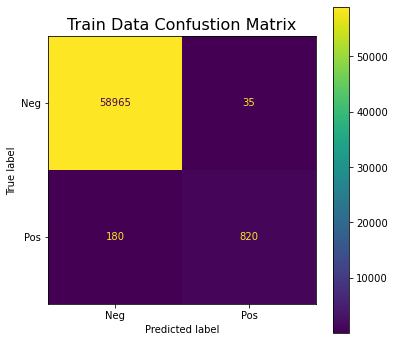

--------------------------------------------------------------------------------


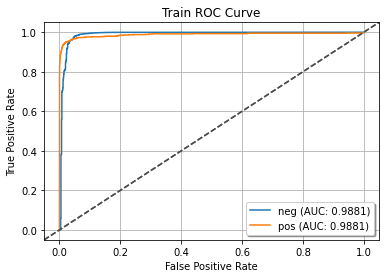

In [24]:
# print result summary and report confusion matrix, ROC and AUC
evl_combine(evl_tr, title="Train")

### - 2(e) Test Data

In [14]:
# Perform test and prediction
pout_ts = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
evl_ts = Evaluation(weka_test)
evl_ts.test_model(lmt, weka_test, pout_ts)

array([0., 0., 0., ..., 0., 0., 0.])

Test Percent Correct: 99.09375
Test Error Rate: 0.0090625
--------------------------------------------------------------------------------

Correctly Classified Instances       15855               99.0938 %
Incorrectly Classified Instances       145                0.9063 %
Kappa statistic                          0.7874
Mean absolute error                      0.0112
Root mean squared error                  0.0851
Relative absolute error                 24.4478 %
Root relative squared error             56.2692 %
Total Number of Instances            16000     

--------------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.264    0.994      0.997    0.995      0.790    0.962     0.996     neg
                 0.736    0.003    0.857      0.736    0.792      0.790    0.962     0.829     pos
Weighted Avg.    

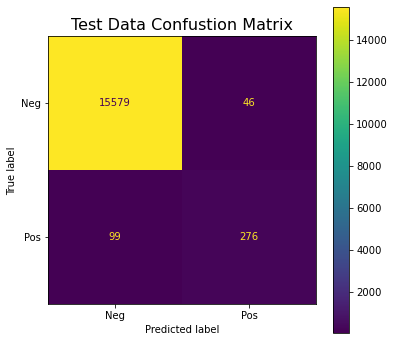

--------------------------------------------------------------------------------


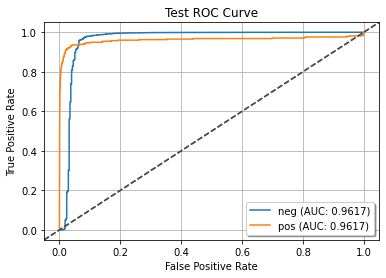

In [15]:
# print result summary and report confusion matrix, ROC and AUC
evl_combine(evl_ts, title="Test")

<strong>Answer</strong><br>
-Cross Validation Result
* The mean accuracy of the cross validation is 99.173%, but the precision for 'pos' label is only 0.796. 
* TP Rate for 'neg' label is much higher than TP Rate for 'pos' label.
* F score for 'neg' is 0.996 but the F score for 'pos' is 0.732
* The above facts are due to the dataset class is highly imbalanced, which has about 60 times 'neg' label than 'pos' label.

-Train and Test Error
* The train error is only 0.00358 and the train auc is 0.9881. The test error is 0.00906 and the test AUC is 0.9617. These results are reasonable since the lower the training error, the higher the variance so that the test error will be higher than training error. 
* The TPR, Precision, Recall, and F score are higher in training result than test result.
* Both train and test ROC curve and AUC score can indicates there is a class imbalance issue in this dataset
* Both train and test ROC curve performs worse than the cross validation result, this is due the training and testing sample difference. So we cannot compare the cross validation and test result directly. 

## 2(f) Use SMOTE (Synthetic Minority Over-sampling Technique) to pre-process your data to compensate for class imbalance Train a Logistic Model Tree using the pre-processed data and repeat 2e. Do not forget that there is a right and a wrong way of cross validation here. Compare the uncompensated case with SMOTE.
ref: https://fracpete.github.io/python-weka-wrapper/examples.html <br>
ref: https://weka.sourceforge.io/doc.packages/SMOTE/weka/filters/supervised/instance/SMOTE.html <br>
ref: https://stackoverflow.com/questions/22632932/how-to-set-parameters-in-weka-to-balance-data-with-smote-filter

In [16]:
%%time
# Perform training
lmt_cv_sm = Classifier(classname='weka.classifiers.trees.LMT')
pout_cv_sm = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
smote = Filter(classname="weka.filters.supervised.instance.SMOTE", options=["-S", "42", "K", "5", "-P", "5800"])
smote.inputformat(weka_train) # let the filter know about the type of data to filter

fc = FilteredClassifier()
fc.filter = smote
fc.classifier = lmt_cv_sm

evl_cv_sm = Evaluation(weka_train)
evl_cv_sm.crossvalidate_model(fc, weka_train, 5, Random(42), pout_cv_sm)

Wall time: 1h 37min 3s


In [17]:
# print result summary and report confusion matrix, ROC and AUC
evl_summary(evl_cv_sm, title="Mean Cross Validation")

Mean Cross Validation Percent Correct: 98.13333333333334
Mean Cross Validation Error Rate: 0.018666666666666668
--------------------------------------------------------------------------------

Correctly Classified Instances       58880               98.1333 %
Incorrectly Classified Instances      1120                1.8667 %
Kappa statistic                          0.5952
Mean absolute error                      0.0345
Root mean squared error                  0.1283
Relative absolute error                105.041  %
Root relative squared error            100.1867 %
Total Number of Instances            60000     

--------------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.983    0.146    0.997      0.983    0.990      0.624    0.924     0.997     neg
                 0.854    0.017    0.467      0.854    0.604  

#### -Training Data

In [18]:
%%time
lmt_sm = Classifier(classname='weka.classifiers.trees.LMT')
pout_tr_sm = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
smote = Filter(classname="weka.filters.supervised.instance.SMOTE", options=["-S", "42", "K", "5", "-P", "5800"])
smote.inputformat(weka_train)# let the filter know about the type of data to filter

fc_sm = FilteredClassifier()
fc_sm.filter = smote
fc_sm.classifier = lmt_sm
fc_sm.build_classifier(weka_train)

evl_tr_sm = Evaluation(weka_train)
evl_tr_sm.test_model(fc_sm, weka_train, pout_tr_sm)

Wall time: 27min 24s


array([0., 0., 0., ..., 0., 0., 0.])

Train Percent Correct: 99.665
Train Error Rate: 0.00335
--------------------------------------------------------------------------------

Correctly Classified Instances       59799               99.665  %
Incorrectly Classified Instances       201                0.335  %
Kappa statistic                          0.9046
Mean absolute error                      0.017 
Root mean squared error                  0.0567
Relative absolute error                 51.8243 %
Root relative squared error             44.3287 %
Total Number of Instances            60000     

--------------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.997    0.028    1.000      0.997    0.998      0.907    0.997     1.000     neg
                 0.972    0.003    0.849      0.972    0.906      0.907    0.997     0.975     pos
Weighted Avg.    0.

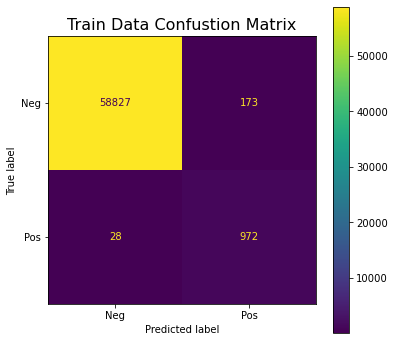

--------------------------------------------------------------------------------


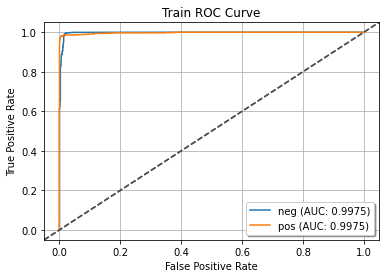

In [19]:
# print training result summary and report confusion matrix, ROC and AUC
evl_combine(evl_tr_sm, title="Train")

#### -Test Data

In [21]:
pout_ts_sm = PredictionOutput(classname="weka.classifiers.evaluation.output.prediction.PlainText")
evl_ts_sm = Evaluation(weka_test)
evl_ts_sm.test_model(fc_sm, weka_test, pout_ts_sm)

array([0., 0., 0., ..., 0., 0., 0.])

Test Percent Correct: 98.6125
Test Error Rate: 0.013875
--------------------------------------------------------------------------------

Correctly Classified Instances       15778               98.6125 %
Incorrectly Classified Instances       222                1.3875 %
Kappa statistic                          0.7306
Mean absolute error                      0.0272
Root mean squared error                  0.1155
Relative absolute error                 59.2893 %
Root relative squared error             76.3322 %
Total Number of Instances            16000     

--------------------------------------------------------------------------------
=== Detailed Accuracy By Class ===

                 TP Rate  FP Rate  Precision  Recall   F-Measure  MCC      ROC Area  PRC Area  Class
                 0.990    0.168    0.996      0.990    0.993      0.736    0.869     0.990     neg
                 0.832    0.010    0.662      0.832    0.738      0.736    0.869     0.683     pos
Weighted Avg.    0.

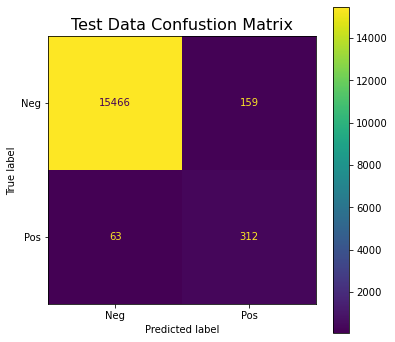

--------------------------------------------------------------------------------


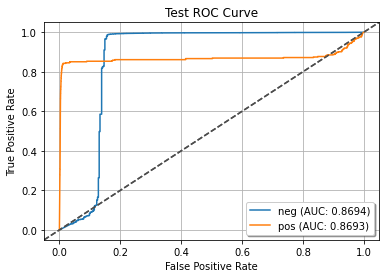

In [22]:
# print result summary and report confusion matrix, ROC and AUC
evl_combine(evl_ts_sm, title="Test")

#### Compare the uncompensated case with SMOTE
-Cross Validation Result
* The mean accuracy of the cross validation of SMOTE case is lower than the uncompensated case. 
* The TPR, Precision, Recall, F scores for 'pos' lable of SMOTE data are higher than the imbalance data.
* The TPR, Precision, Recall, F scores for 'neg' label of SMOTE data are dropped slightly, due to the increase of incorrectly classifiyed instances.
* The above foundings indicate that in order to increase the precision for minority class ('pos' label), we need to sacrifice the TPR for majority class and the accuracy of overall predictions as trade off.

-Train and Test Result<br>

SMOTE Case: 
* The train error rate is lower than test error rate. These results are reasonable since the lower the training error, the higher the variance so that the test error will be higher than training error. 
* The TPR, Precision, Recall, and F score are higher in training result than test result.
* The AUC score and ROC curve nearly perfect, but the test AUC score is much lower, seems like the model is a little overfitting.

SMOTE Case vs Uncompensated Case<br>

* Compare the test result of 2f to 2e, the accuracy dropped, the precision of prediction 'pos' label is significantly increased. Which indicates the model has improved in 'pos' label prediction
* The test results from both cases confirmed the conclusion from cross validation